In [2]:
# This cell just imports relevant modules

import numpy
import pylab
from sympy import sin, cos, exp, ln, Function, Symbol, diff, integrate, limit, oo, series, factorial
from math import pi
import mpmath
%matplotlib inline
import matplotlib.pyplot as plt

# Series


## Sequences

Lecture 6, slide 10

In [3]:
# Finite sequence example. The elements of the sequence are stored in a list
finite_sequence = [2*k for k in range(1, 5)] 
# Remember: range(A,B) generates integers from A up to B-1, so we need to use B=5 here

## Convergence of sequences

Lecture 6, slide 11, 13, 14

In [4]:
k = Symbol('k')
print("As k->infinity, the sequence {k} tends to: %f" % limit(k, k, oo) ) 
# The 'oo' here is SymPy's notation for infinity

print("As k->infinity, the sequence {1/k} tends to: %f" % limit(1.0/k, k, oo)) 

print("As k->infinity, the sequence {exp(1/k)} tends to: %f" % limit(exp(1.0/k), k, oo)) 

print("As k->infinity, the sequence {(k**3 + 2*k - 4)/(k**3 + 1)} tends to: %f" 
      % limit((k**3 + 2*k - 4)/(k**3 + 1), k, oo)) 

As k->infinity, the sequence {k} tends to: inf
As k->infinity, the sequence {1/k} tends to: 0.000000
As k->infinity, the sequence {exp(1/k)} tends to: 1.000000
As k->infinity, the sequence {(k**3 + 2*k - 4)/(k**3 + 1)} tends to: 1.000000


## Series

Lecture 6, slide 15

In [5]:
# Using list comprehension:
print("The sum of 3*k + 1 (from k=0 to k=4) is: %f" % sum([3*k + 1 for k in range(0,5)])) 
# Note: we could also use the nsum function (part of the module mpmath): 
# import mpmath
# print mpmath.nsum(lambda k: 3*k + 1, [0, 4])

x = 1
print("The sum of (x**k)/(k!) from k=0 to k=4, with x = 1, is: %f" % sum([x**k/factorial(k) for k in range(1,5)])) 

The sum of 3*k + 1 (from k=0 to k=4) is: 35.000000
The sum of (x**k)/(k!) from k=0 to k=4, with x = 1, is: 1.708333


## Arithmetic progression

Lecture 6, slide 18

In [6]:
print("The sum of 5 + 4*k up to the 11th term (i.e. up to k=10) is: %f" % sum([5 + 4*k for k in range(0,11)])) 

The sum of 5 + 4*k up to the 11th term (i.e. up to k=10) is: 275.000000


## Geometric progression

Lecture 6, slide 21

In [7]:
print("The sum of 3**k up to the 7th term (i.e. up to k=6) is: %f" % sum([3**k for k in range(0,7)])) 

The sum of 3**k up to the 7th term (i.e. up to k=6) is: 1093.000000


## Infinite series

Lecture 6, slide 23, 24, 25

In [8]:
print("The sum of the infinite series sum(1/(2**k)) is: %f" % mpmath.nsum(lambda k: 1/(2**k), [1, mpmath.inf]))  
print("The sum of the infinite alternating series sum(((-1)**(k+1))/k) is: %f" 
      % mpmath.nsum(lambda k: ((-1)**(k+1))/k, [1, mpmath.inf])) 

The sum of the infinite series sum(1/(2**k)) is: 1.000000
The sum of the infinite alternating series sum(((-1)**(k+1))/k) is: 0.693147


## Ratio test

Lecture 6, slide 27

In [9]:
# A divergent example
k = Symbol('k')
f = (2**k)/(3*k)
f1 = (2**(k+1))/(3*(k+1))
ratio = f1/f

lim = limit(ratio, k, oo) 
print("As k -> infinity, the ratio tends to: %f" % lim) 
if(lim < 1.0):
    print("The series converges") 
elif(lim > 1.0):
    print("The series diverges") 
else:
    print("The series either converges or diverges") 

# A converging example
f = (2**k)/(5**k)
f1 = (2**(k+1))/(5**(k+1))
ratio = f1/f

As k -> infinity, the ratio tends to: 2.000000
The series diverges


## Power series

Lecture 6, slide 30

In [10]:
k = Symbol('k')
x = Symbol('x')

a = 1.0/k
f = a*(x**k)

a1 = 1.0/(k+1)
f1 = a1*(x**(k+1))

ratio = abs(a/a1)
R = limit(ratio, k, oo)
print("The radius of convergence (denoted R) is: %f" % R) 

x = 0.5
if(abs(x) < 1):
    print("The series converges for |x| = %f (< R)" % abs(x)) 
elif(abs(x) > 1):
    print("The series diverges for |x| = %f (> R)" % abs(x)) 
else:
    print("The series either converges or diverges for |x| = %f (== R)\n" % abs(x)) 

The radius of convergence (denoted R) is: 1.000000
The series converges for |x| = 0.500000 (< R)


## Useful series

Lecture 6, slide 34

In [11]:
x = Symbol('x')
r = Symbol('r')

# Note: the optional argument 'n' allows us to truncate the series
# after a certain order of x has been reached.
print("1/(1+x) = ", series(1.0/(1.0+x), x, n=4)) 
print("1/(1-x) = ", series(1.0/(1.0-x), x, n=4)) 
print("ln(1+x) = ", series(ln(1.0+x), x, n=4)) 
print("exp(x) = ", series(exp(x), x, n=4)) 
print("cos(x) = ", series(cos(x), x, n=7)) 
print("sin(x) = ", series(sin(x), x, n=8)) 

1/(1+x) =  1.0 - 1.0*x + 1.0*x**2 - 1.0*x**3 + O(x**4)
1/(1-x) =  1.0 + 1.0*x + 1.0*x**2 + 1.0*x**3 + O(x**4)
ln(1+x) =  1.0*x - 0.5*x**2 + 0.333333333333333*x**3 + O(x**4)
exp(x) =  1 + x + x**2/2 + x**3/6 + O(x**4)
cos(x) =  1 - x**2/2 + x**4/24 - x**6/720 + O(x**7)
sin(x) =  x - x**3/6 + x**5/120 - x**7/5040 + O(x**8)


## Taylor series plots

### ln(1+x) with different number of terms n

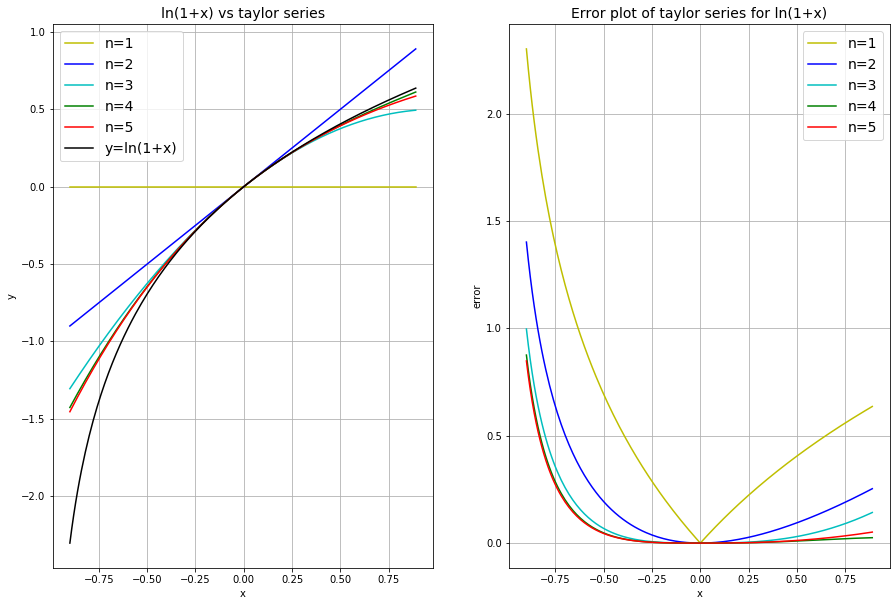

In [14]:
def ln_taylor(x, n):
    y = 0
    for i in range(1,n):
        y += (-1)**(i+1) * (x**i)/(factorial(i)) # taylor series of ln(1+x)
    return y 

x = numpy.array([0.01*i for i in range(-90, 90)]) # x range between -0.9 and 0.9

ln = numpy.log(1+x)  # actual function

n = numpy.array([i for i in range(1, 6)]) # number of terms between 1 and 5

y_ln = numpy.zeros((len(n), len(x))) 
for i in range(len(n)):
    y_ln[i] = ln_taylor(x, n[i]) # values from taylor series
    
ln_error = numpy.zeros((len(n), len(x)))
for i in range(len(n)):
    for j in range(len(x)):
        ln_error[i][j] = abs(y_ln[i][j] - ln[j]) # calculate difference between taylor series and function
        
colour = ['y', 'b', 'c', 'g', 'r']           

plt.figure(figsize=(15,10))

plt.subplot(121)
for i in range(len(n)):
    plt.plot(x, y_ln[i], colour[i], label='n=%.d' % (n[i]))
plt.plot(x, ln, 'k', label='y=ln(1+x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('ln(1+x) vs taylor series', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)

plt.subplot(122)
for i in range(len(n)):
    plt.plot(x, ln_error[i], colour[i], label='n=%.d' % (n[i]))
plt.xlabel('x')
plt.ylabel('error')
plt.title('Error plot of taylor series for ln(1+x)', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)

plt.show()



### exp(x) with different number of terms n

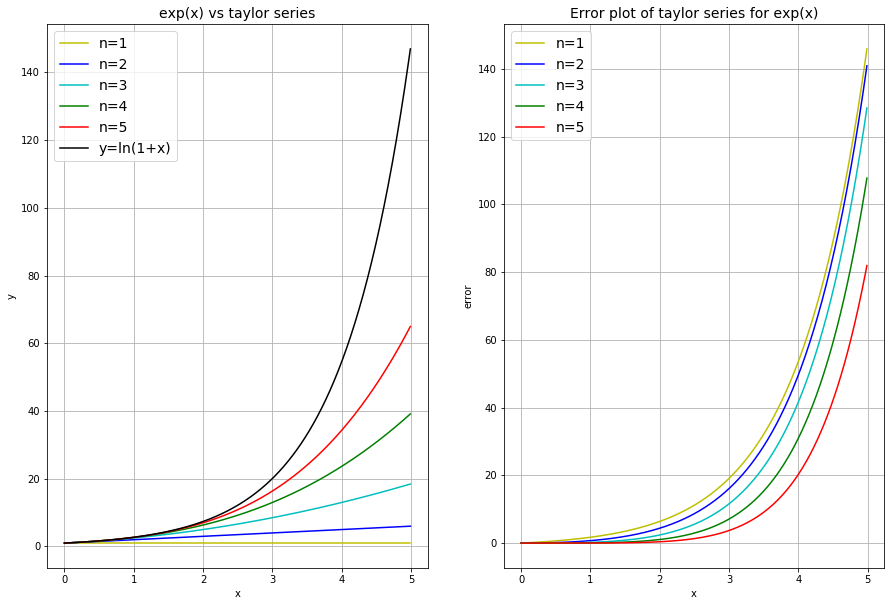

In [12]:
def exp_taylor(x, n):
    y = 0
    for i in range(n):
        y += x**i / factorial(i) # taylor series for exp(x)
    return y


x = numpy.array([0.01*i for i in range(0, 500)]) # x between 0 and 5

expx = numpy.exp(x) # actual function

n = numpy.array([i for i in range(1, 6)]) # number of terms between 1 and 5

y_exp = numpy.zeros((len(n), len(x)))
for i in range(len(n)):
    y_exp[i] = exp_taylor(x, n[i]) # values from taylor series

exp_error = numpy.zeros((len(n), len(x)))
for i in range(len(n)):
    for j in range(len(x)):
        exp_error[i][j] = abs(y_exp[i][j] - expx[j]) # calculate difference between taylor series and function
         
colour = ['y', 'b', 'c', 'g', 'r']           

plt.figure(figsize=(15,10))

plt.subplot(121)
for i in range(len(n)):
    plt.plot(x, y_exp[i], colour[i], label='n=%.d' % (n[i]))
plt.plot(x, expx, 'k', label='y=ln(1+x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('exp(x) vs taylor series', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)

plt.subplot(122)
for i in range(len(n)):
    plt.plot(x, exp_error[i], colour[i], label='n=%.d' % (n[i]))
plt.xlabel('x')
plt.ylabel('error')
plt.title('Error plot of taylor series for exp(x)', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)

plt.show()


### sin(x) with different number of terms n

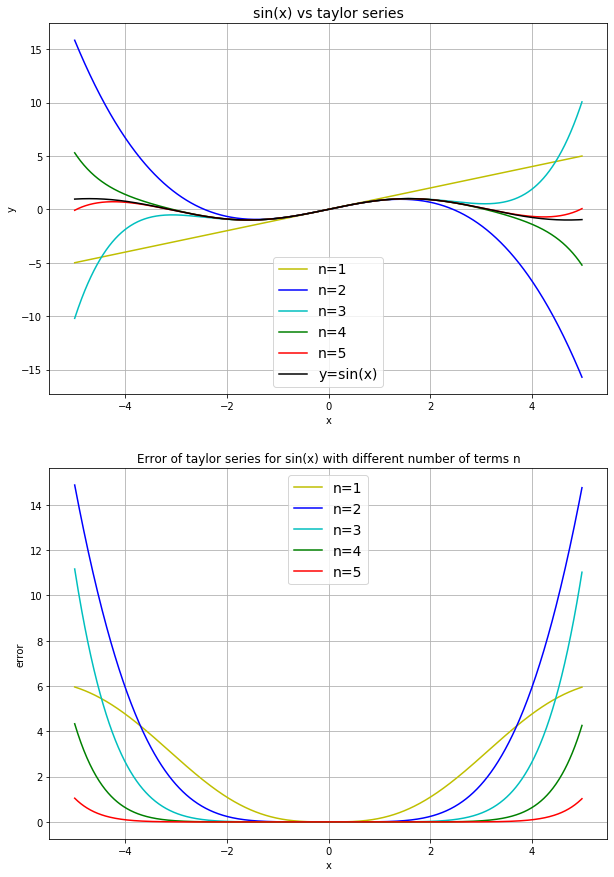

In [13]:
def sin_taylor(x, n):
    y = 0
    for i in range(n):
        y += (-1)**(i)*(x**(2*i+1) / factorial(2*i+1)) # taylor series for sin(x)
    return y

x = numpy.array([0.01*i for i in range(-500, 500)]) # x between -5 and 5

sinx = numpy.sin(x) # actual function

n = numpy.array([i for i in range(1, 6)]) # number of terms between 1 and 5

y_sin = numpy.zeros((len(n), len(x)))

for i in range(len(n)):
    y_sin[i] = sin_taylor(x, n[i]) # values from taylor series
    
sin_error = numpy.zeros((len(n), len(x)))
for i in range(len(n)):
    for j in range(len(x)):
        sin_error[i][j] = abs(y_sin[i][j] - sinx[j]) # calculate difference between taylor series and function

colour = ['y', 'b', 'c', 'g', 'r']            

plt.figure(figsize=(10, 15))

plt.subplot(211)
for i in range(len(n)):
    plt.plot(x, y_sin[i], colour[i], label='n=%.d' % (n[i]))
plt.plot(x, sinx, 'k', label='y=sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(x) vs taylor series', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)

plt.subplot(212)
for i in range(len(n)):
    plt.plot(x, sin_error[i], colour[i], label='n=%.d' % (n[i]))
plt.xlabel('x')
plt.ylabel('error')
plt.title('Error of taylor series for sin(x) with different number of terms n')
plt.legend(loc='best', fontsize=14)
plt.grid(True)

plt.show()



```{note}
For the Taylor series plots - the more terms there are in the series the more accurate it is as it better approximates the function.

The error of the taylor series decreases as x approaches 0.
```